### Libraries and Data Import

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')
from sklearn import linear_model
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans


data=pd.read_excel(r'C:\Users\Mike\Desktop\Survey_clean.xlsx')

In [3]:
data.columns = data.columns.str.strip().str.replace('Unnamed: 1','Gender').str.replace('Unnamed: 2','Strategy').str.replace('ID.o', 'ID_o')

### Columns/Questions kept:

##### ID_o = Trading ID
##### Gender = Respondent Gender
##### Q2 = "I traded using all of the information provided to me at each stage"
##### Q9 = "I believe that I can improve on my net profits if I had more information even if I did not have any technological tools to analyze the information"
##### Q12 = "The source (Highly reputed like Wall Street Journal/ Bloomberg versus low/unknown reputation like Sun news) of information would impact my trading decisions"
##### Q14 = "The medium (news /blog /video/ tool based) of information impacted my trading decisions"
##### Q15 = "I believe that more stock specific information could have helped me to increase my net profits"
##### Q30 = "I have had prior experience in live trading stock /shares"

### Dataframe trimming and character replacement

In [4]:
# keeping only columns that we want in the data frame

data = data[['ID_o', 'Gender','Q2','Q9','Q12','Q14','Q15','Q30']];
data[['Desk', 'Trader']] = data.ID_o.str.split("C", n=1, expand = True)

In [5]:
data['Desk'] = data['Desk'].str.replace('S 10','S10').str.replace('S37b08T','S3').str.replace('S3 ', 'S3')
data.Q2 = data.Q2.str.replace("Strongly Disagree",'5').str.replace("Neither Agree nor Disagree", '3').str.replace("Strongly Agree", '1').str.replace("Disagree",'4').str.replace("Agree", '2')
data.Q9 = data.Q9.str.replace("Strongly Disagree",'5').str.replace("Neither Agree nor Disagree", '3').str.replace("Strongly Agree", '1').str.replace("Disagree",'4').str.replace("Agree", '2')
data.Q12 = data.Q12.str.replace("Strongly Disagree",'5').str.replace("Neither Agree nor Disagree", '3').str.replace("Strongly Agree", '1').str.replace("Disagree",'4').str.replace("Agree", '2')
data.Q14 = data.Q14.str.replace("Strongly Disagree",'5').str.replace("Neither Agree nor Disagree", '3').str.replace("Strongly Agree", '1').str.replace("Disagree",'4').str.replace("Agree", '2')
data.Q15 = data.Q15.str.replace("Strongly Disagree",'5').str.replace("Neither Agree nor Disagree", '3').str.replace("Strongly Agree", '1').str.replace("Disagree",'4').str.replace("Agree", '2')
data.Q30 = data.Q30.str.replace("Yes",'Y').str.replace("No", 'N')

#checking data frame
data.head(10)

,ID_o,Gender,Q2,Q9,Q12,Q14,Q15,Q30,Desk,Trader
0,NaN,Gender,I traded using ALL of the information provided...,I believe that I can improve on my net profits...,The source (Highly reputed like Wall Street Jo...,The medium (news /blog /video/ tool based) of ...,I believe that more stock specific information...,I have had prior experience in live trading st...,NaN,NaN
1,S6C14a1,F,1,3,2,3,2,Y,S6,14a1
2,S6C12B1,F,5,1,3,4,1,N,S6,12B1
3,S6C1514,M,1,4,3,3,1,N,S6,1514
4,S6C1414,M,3,1,2,4,1,N,S6,1414
5,S6C14b1,M,3,1,1,5,1,N,S6,14b1
6,S6C1914,M,2,1,2,2,1,N,S6,1914
7,S6C15a1,F,5,5,5,5,5,N,S6,15a1
8,S6C1714,M,2,3,2,4,2,N,S6,1714
9,S6C17B1,F,2,4,1,2,1,N,S6,17B1


In [6]:
data = data.iloc[1:]
data.head(10)

# removed first row with column names

,ID_o,Gender,Q2,Q9,Q12,Q14,Q15,Q30,Desk,Trader
1,S6C14a1,F,1,3,2,3,2,Y,S6,14a1
2,S6C12B1,F,5,1,3,4,1,N,S6,12B1
3,S6C1514,M,1,4,3,3,1,N,S6,1514
4,S6C1414,M,3,1,2,4,1,N,S6,1414
5,S6C14b1,M,3,1,1,5,1,N,S6,14b1
6,S6C1914,M,2,1,2,2,1,N,S6,1914
7,S6C15a1,F,5,5,5,5,5,N,S6,15a1
8,S6C1714,M,2,3,2,4,2,N,S6,1714
9,S6C17B1,F,2,4,1,2,1,N,S6,17B1
10,S6C16a1,F,3,4,4,3,3,N,S6,16a1


### Basic Data Exploration

In [7]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 1 to 363
Data columns (total 10 columns):
ID_o      363 non-null object
Gender    363 non-null object
Q2        363 non-null object
Q9        363 non-null object
Q12       363 non-null object
Q14       363 non-null object
Q15       363 non-null object
Q30       363 non-null object
Desk      363 non-null object
Trader    362 non-null object
dtypes: object(10)
memory usage: 28.4+ KB


In [8]:
data.describe(include="all")

# ID_o: 14 repeating IDs
# Gender: two unique values (F/M)
# Desk: 10 unique desks
# Trader: 235 unique traders

,ID_o,Gender,Q2,Q9,Q12,Q14,Q15,Q30,Desk,Trader
count,363,363,363,363,363,363,363,363,363,362
unique,349,2,5,5,5,5,5,2,10,235
top,S2C1208,M,2,2,2,2,2,N,S6,10a1
freq,2,193,110,167,203,179,212,289,52,5


### Categorical Histograms

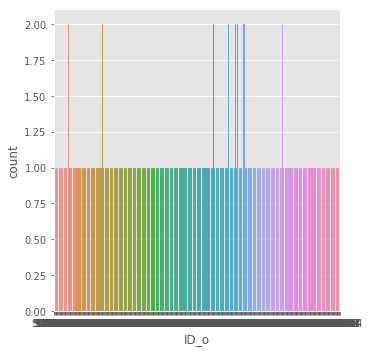

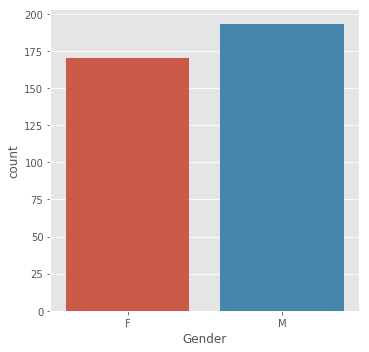

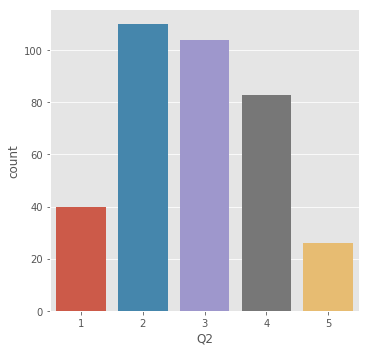

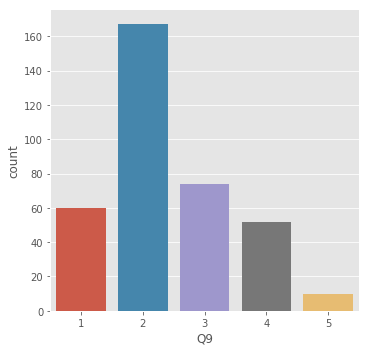

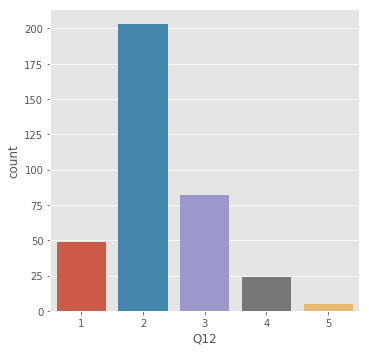

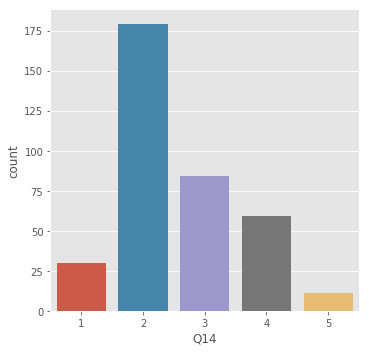

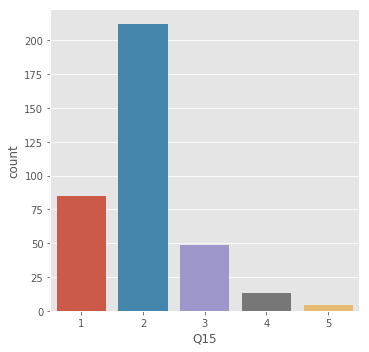

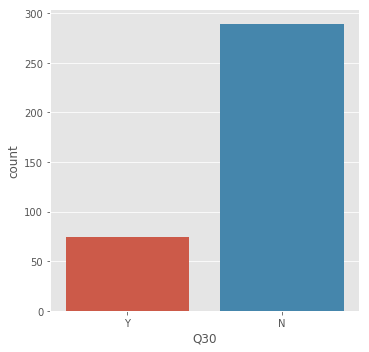

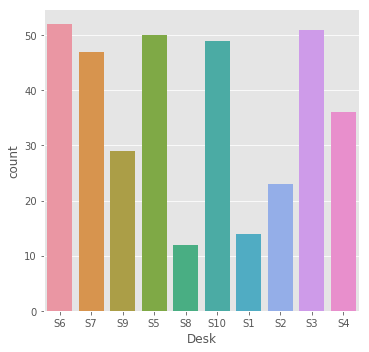

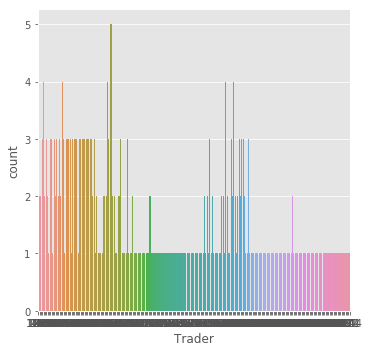

In [9]:
sns.catplot(x="ID_o", kind = "count", data=data);
# some IDs exist multiple times in the data

sns.catplot(x="Gender", kind = "count", data=data);
# close to the same number of male and female respondents

sns.catplot(x="Q2", kind = "count", data=data);
# looks somewhat like a normal distribition. few respondents selected an extreme "strongly agree/disagree" stance on this

sns.catplot(x="Q9", kind = "count", data=data);
# far more "agree" answers than any other. right skew.
# indicates that many feel they could improve their results with more raw data

sns.catplot(x="Q12", kind = "count", data=data);
# more "agree" answers than any other. right skew
# very few respondents disagree/strongly disagree that their information source would impact their trading decisions.
# This indicates that the reputation of the information source affects trading decisions

sns.catplot(x="Q14", kind = "count", data=data);
# more "agree" answers than any other. right skew
# more disagree/strongly disagree responses than previous question.
# indicates that the way in which information is delivered can have an effect on trading decisions

sns.catplot(x="Q15", kind = "count", data=data);
# very low "disagree/strongly disagree" responses to this question.
# overwhelming majority selected agree/strongly agree
# indicates that most respondents believe they could have done better if more specific information were given.

# Q9, Q12, Q14, and Q15 all had extremely low "strongly disagree" responses.

sns.catplot(x="Q30", kind = "count", data=data);
# few respondents have live traded stocks/shares before
# may indicate that respondents are inexperienced or new at trading

sns.catplot(x="Desk", kind = "count", data=data);

sns.catplot(x="Trader", kind = "count", data=data);
# several traders appear multiple times in the data

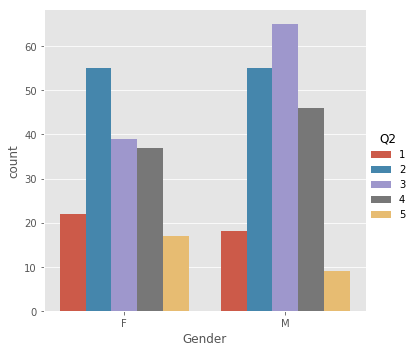

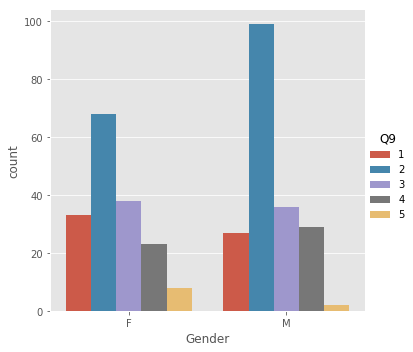

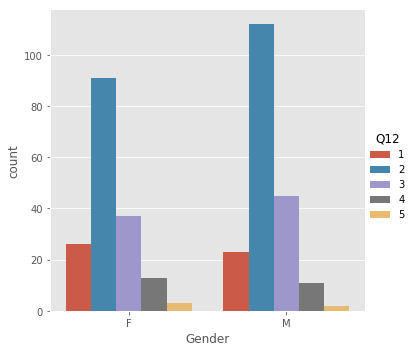

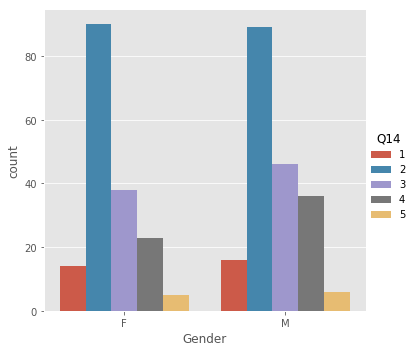

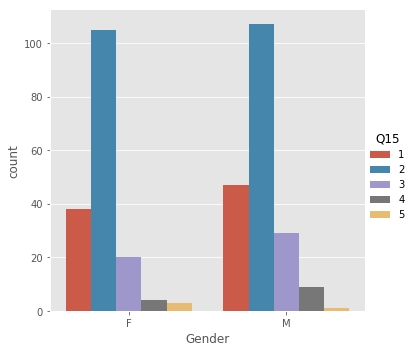

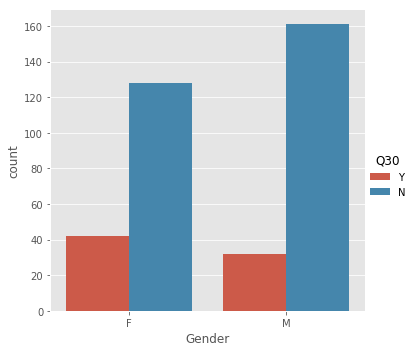

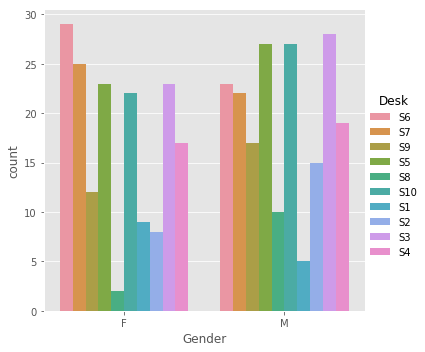

In [10]:
sns.catplot(x="Gender", kind = "count", hue="Q2", data=data);

sns.catplot(x="Gender", kind = "count", hue="Q9", data=data);

sns.catplot(x="Gender", kind = "count", hue="Q12", data=data);

sns.catplot(x="Gender", kind = "count", hue="Q14", data=data);

sns.catplot(x="Gender", kind = "count", hue="Q15", data=data);

sns.catplot(x="Gender", kind = "count", hue="Q30", data=data);

sns.catplot(x="Gender", kind = "count", hue="Desk", data=data);

# for the most part, the graphs for male vs female are very similar.

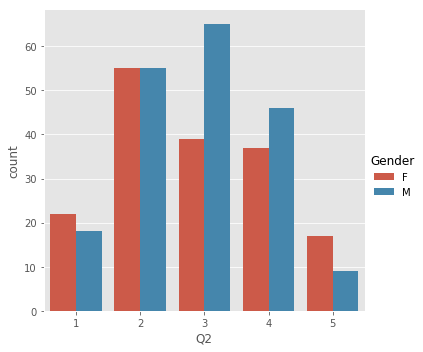

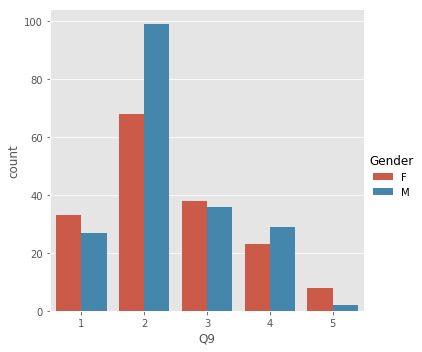

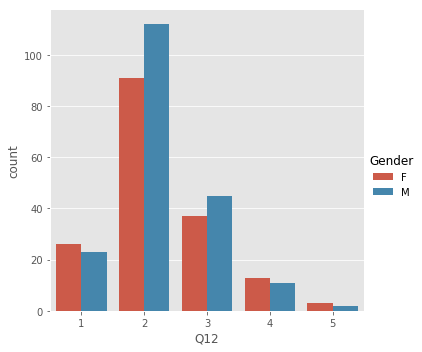

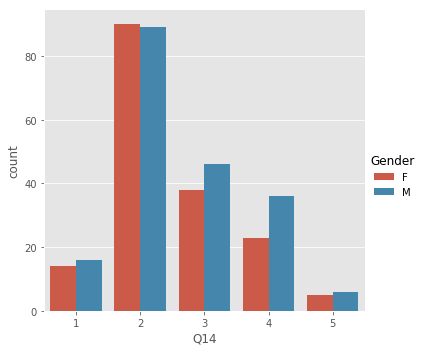

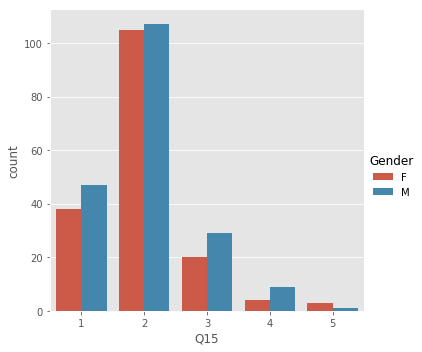

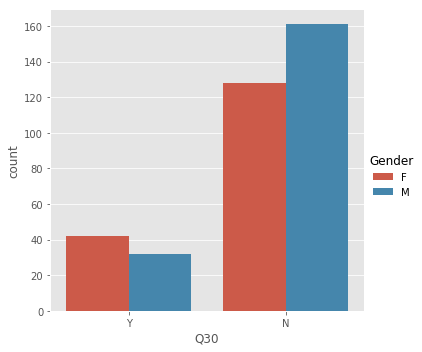

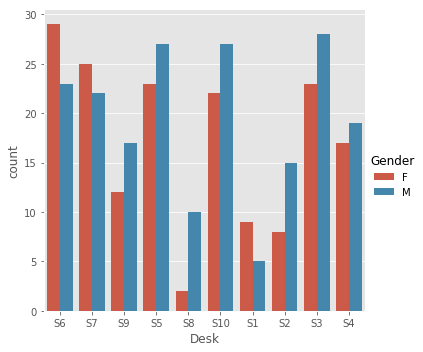

In [11]:
# same exact data as above, swapped x and hue for new visualization of data

sns.catplot(x="Q2", kind = "count", hue="Gender", data=data);

sns.catplot(x="Q9", kind = "count", hue="Gender", data=data);

sns.catplot(x="Q12", kind = "count", hue="Gender", data=data);

sns.catplot(x="Q14", kind = "count", hue="Gender", data=data);

sns.catplot(x="Q15", kind = "count", hue="Gender", data=data);

sns.catplot(x="Q30", kind = "count", hue="Gender", data=data);

sns.catplot(x="Desk", kind = "count", hue="Gender", data=data);

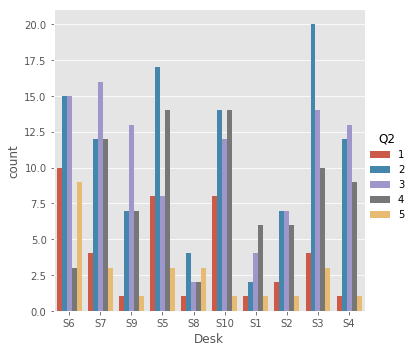

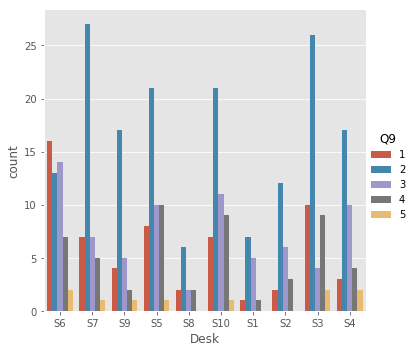

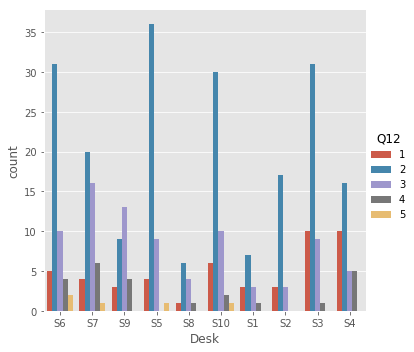

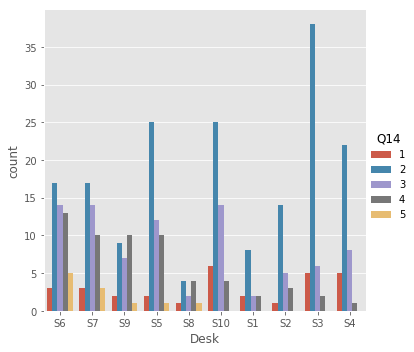

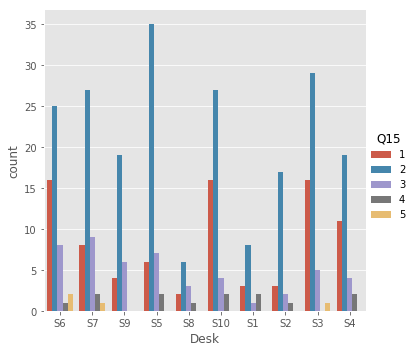

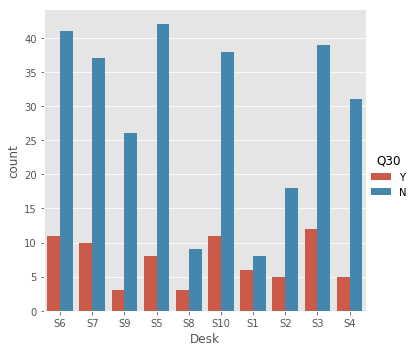

In [12]:
sns.catplot(x="Desk", kind = "count", hue="Q2", data=data);

sns.catplot(x="Desk", kind = "count", hue="Q9", data=data);

sns.catplot(x="Desk", kind = "count", hue="Q12", data=data);

sns.catplot(x="Desk", kind = "count", hue="Q14", data=data);

sns.catplot(x="Desk", kind = "count", hue="Q15", data=data);

sns.catplot(x="Desk", kind = "count", hue="Q30", data=data);

## Dendrograms

#### Removing/Modifying some data

In [13]:
data=data.drop('ID_o', axis=1)
data.Gender = data.Gender.str.replace("F",'0').str.replace("M", '1')
data.Q30 = data.Q30.str.replace("Y",'1').str.replace("N", '0')
data=data.drop('Desk', axis=1)
data=data.drop('Trader', axis=1)

In [14]:
#data['Gender']=data['Gender'].astype("int")
#data['Q2']=data['Q2'].astype("int")
#data['Q9']=data['Q9'].astype("int")
#data['Q12']=data['Q12'].astype("int")
#data['Q14']=data['Q14'].astype("int")
#data['Q15']=data['Q15'].astype("int")
#data['Q30']=data['Q30'].astype("int")

In [15]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 1 to 363
Data columns (total 7 columns):
Gender    363 non-null int32
Q2        363 non-null int32
Q9        363 non-null int32
Q12       363 non-null int32
Q14       363 non-null int32
Q15       363 non-null int32
Q30       363 non-null int32
dtypes: int32(7)
memory usage: 10.0 KB


#### Dendrogram Code

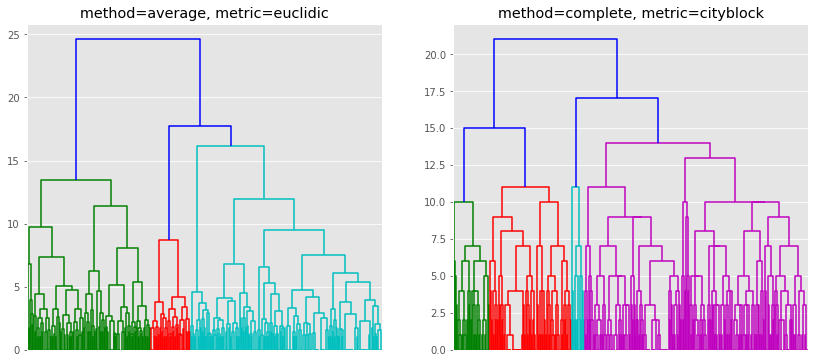

In [16]:
d1 = linkage(data, method='ward', metric='euclidean')
d2 = linkage(data, method='complete', metric='cityblock')

plt.figure(figsize=(14,6))

plt1 = plt.subplot(1,2,1)
plt.title("method=average, metric=euclidic")
dendrogram(d1)
plt1.set_xticks([])

plt2 = plt.subplot(1,2,2)
plt.title("method=complete, metric=cityblock")
dendrogram(d2)
plt2.set_xticks([])

plt.show();

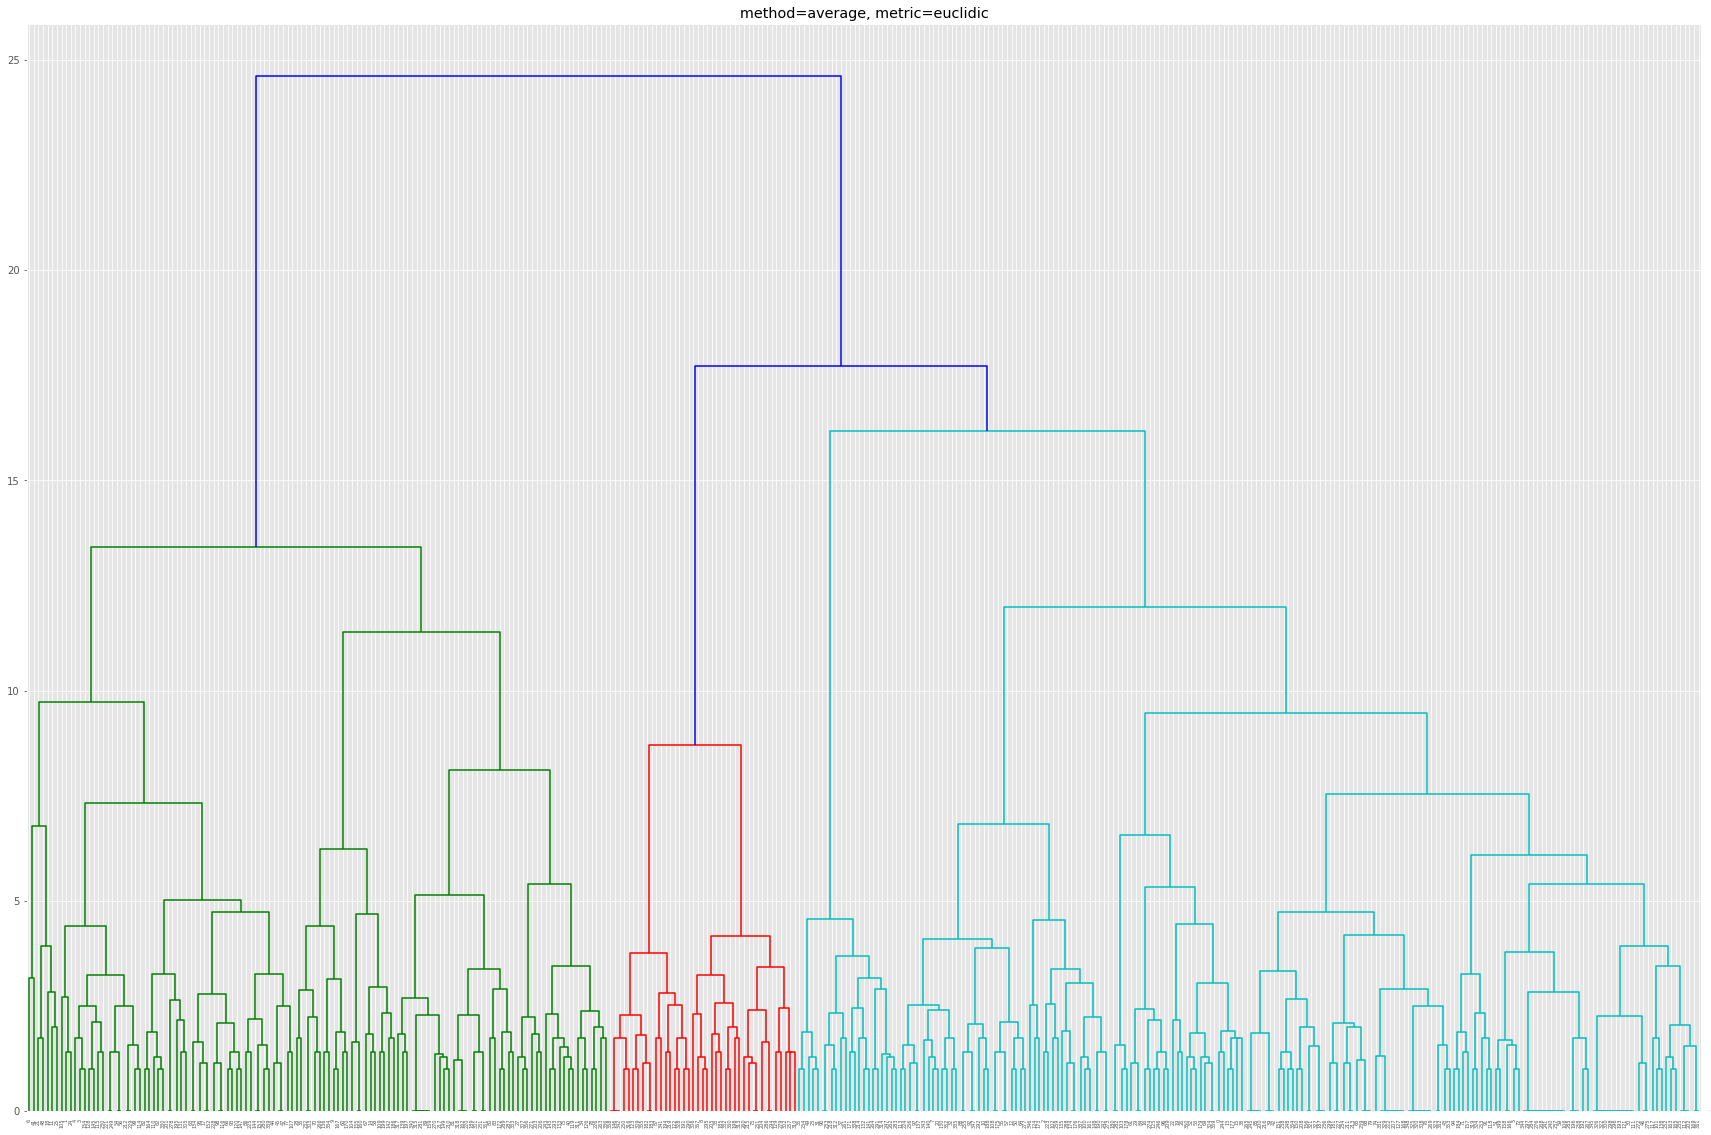

In [17]:
# enlarging dendrogram

plt.figure(figsize=(30,20))

plt.title("method=average, metric=euclidic")
dendrogram(d1)
plt1.set_xticks([]);

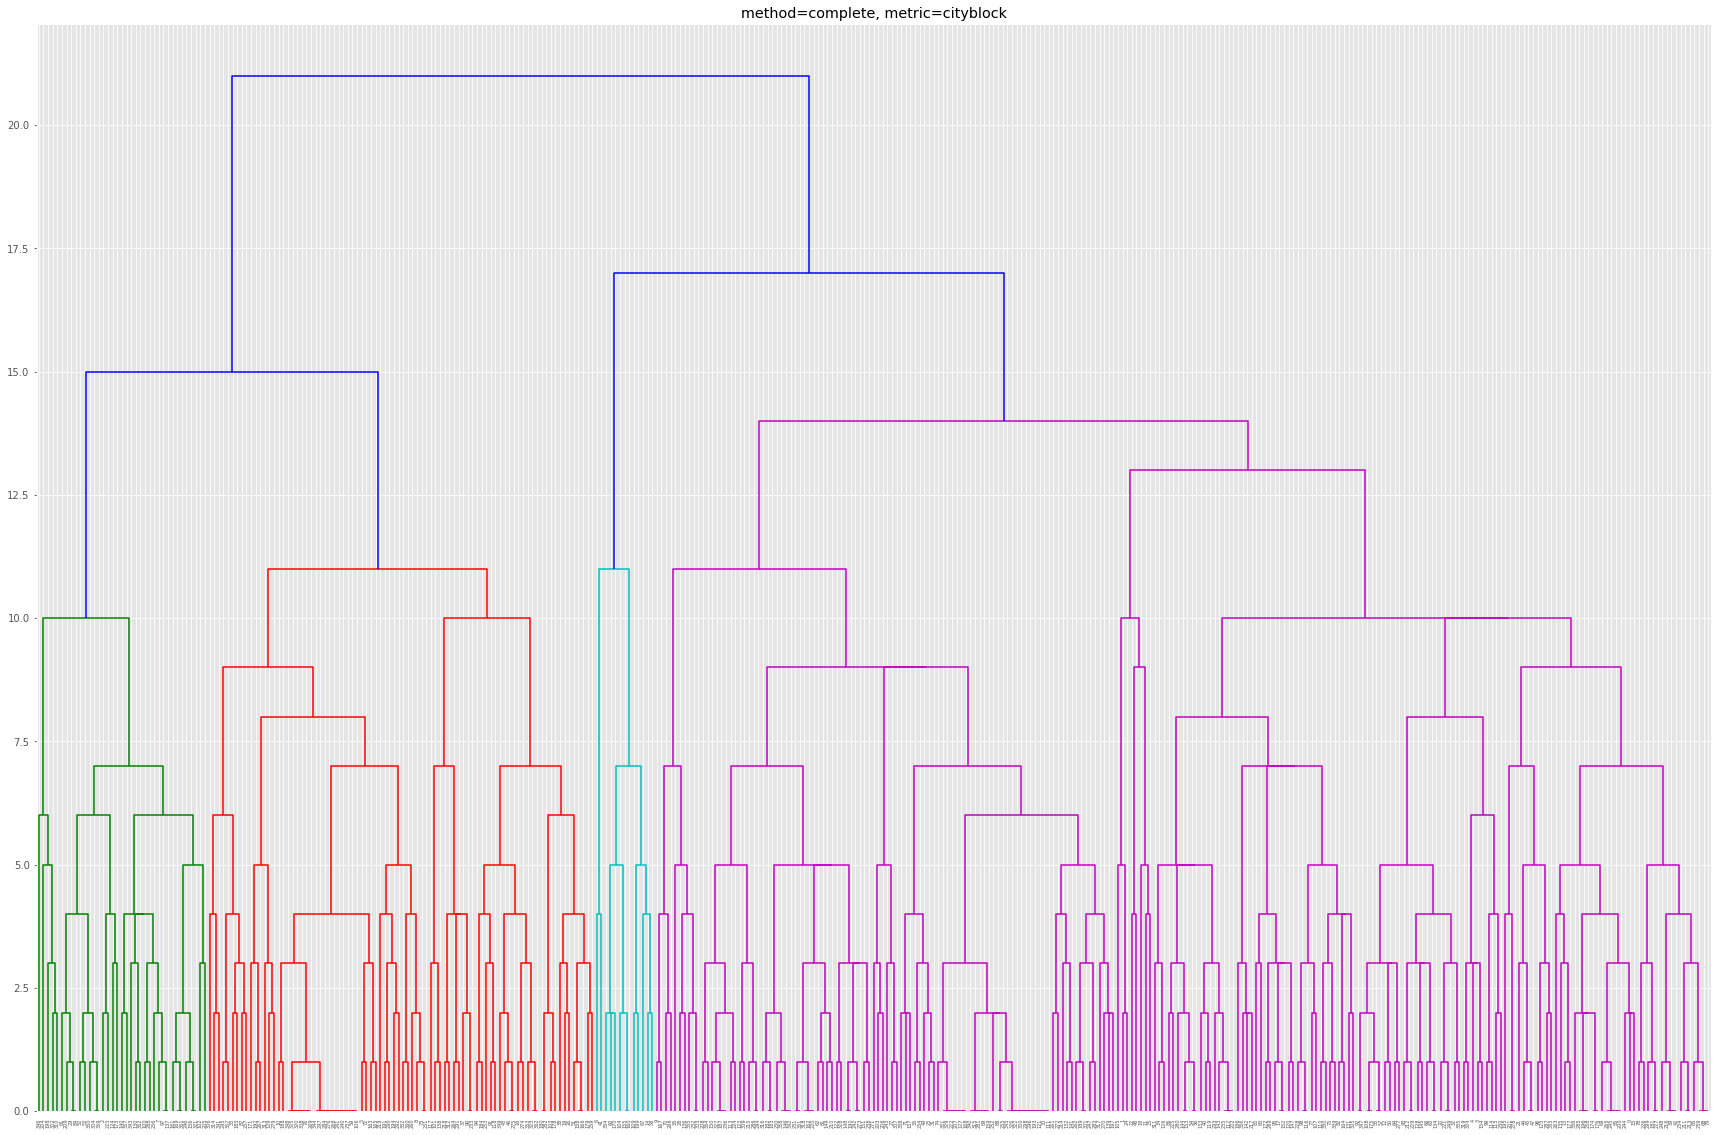

In [18]:
# enlarging dendrogram

plt.figure(figsize=(30,20))

plt.title("method=complete, metric=cityblock")
dendrogram(d2)
plt2.set_xticks([]);

## Clustering

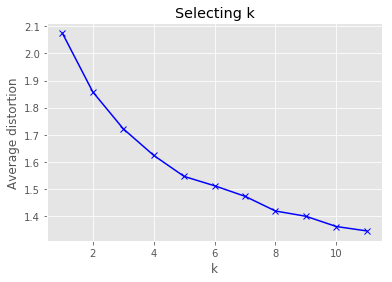

In [19]:
# finding number of clusters to use

clusters=range(1,12)
meanDistortions=[]
 
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data)
    prediction=model.predict(data)
    meanDistortions.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
 
#plt.cla()
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k');

In [20]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([0, 4, 0, 4, 4, 0, 4, 0, 2, 1, 0, 4, 0, 0, 1, 0, 0, 4, 4, 0, 0, 4,
       0, 3, 4, 4, 0, 1, 1, 0, 0, 3, 0, 2, 1, 3, 1, 3, 0, 0, 1, 4, 0, 0,
       4, 4, 0, 4, 4, 3, 0, 0, 0, 0, 4, 0, 4, 0, 1, 0, 1, 0, 4, 4, 0, 0,
       4, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 4, 1, 0, 1, 1, 4, 1, 0, 0, 4, 2,
       0, 1, 3, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0, 1, 4, 0, 4, 0, 1,
       4, 0, 0, 0, 4, 4, 4, 0, 0, 1, 4, 0, 2, 2, 0, 0, 1, 0, 4, 2, 0, 4,
       3, 1, 4, 0, 1, 0, 0, 1, 0, 3, 1, 1, 4, 4, 2, 4, 0, 1, 0, 0, 4, 4,
       4, 1, 0, 0, 0, 1, 1, 0, 1, 0, 4, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 4, 0, 1,
       2, 1, 0, 4, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 4, 0, 3, 2, 0, 1, 3, 2,
       1, 4, 0, 0, 0, 4, 1, 0, 4, 4, 4, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 3, 0, 4, 2, 2, 0, 0, 3, 0, 0, 2, 0, 0, 2, 3, 3, 1,
       3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 4, 2, 4, 1, 0, 3, 0, 0,
       2, 1, 0, 1, 2, 3, 0, 1, 2, 2, 0, 0, 0, 0, 0,

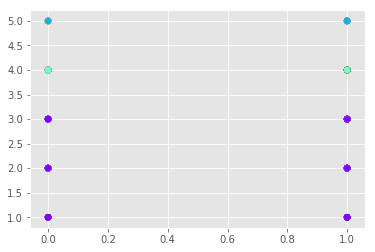

In [21]:
plt.scatter(data.values[:,0],data.values[:,1], c=cluster.labels_, cmap='rainbow');

# results are the same regardless of number of clusters, likely due to data type

### Different Clustering

In [22]:
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
kmeans.fit(data)
print(kmeans.cluster_centers_)

y = kmeans.fit_predict(data);

[[0.53846154 1.71153846 1.94230769 2.17307692 2.53846154 1.88461538
  0.26923077]
 [0.61904762 3.47619048 1.96825397 3.         3.80952381 2.20634921
  0.07936508]
 [0.54022989 3.51724138 1.73563218 1.93103448 2.         1.82758621
  0.25287356]
 [0.47272727 3.92727273 3.56363636 2.61818182 2.72727273 2.67272727
  0.10909091]
 [0.46296296 2.12962963 3.72222222 1.75925926 1.90740741 1.61111111
  0.24074074]]


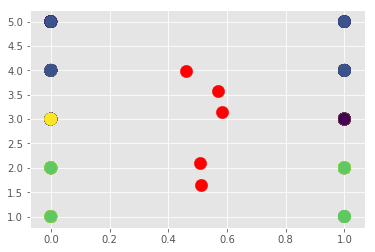

In [23]:
plt.scatter(data.values[:,0], data.values[:,1], c=y, s= 150, cmap='viridis');

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=150);